<a href="https://colab.research.google.com/github/pauarmentaa/Mapas-de-calor-y-boxplots/blob/main/DATOS_DE_FACTURACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UF-6 Actividad Evaluable: Mapas de calor y boxplots**
# **EQUIPO : TEAM 4 FANTASTIC**
##**Integrantes del equipo:**
###Abner Palma García - A01735312
###Edwin Nepomuceno Rivera - A01174706
###Luis Alberto Mirón Toruño - A01735489
###Paula Gabriela Armenta Nazario - A01735618

In [ ]:
# Cargar librerías 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## **ARCHIVO: DATOS DE FACTURACIÓN**

In [ ]:
# Cargar el archivo a utilizar 
fact = pd.read_excel("Datos_Facturacion _sin_nulos.xlsx")
fact = fact.drop(["Unnamed: 0"], axis=1)
fact

,CVE_DOC,CVE_CLPV,STATUS,CVE_VEND,FECHAELAB,FECHA_DOC,FECHA_ENT,FECHA_VEN,FECHA_CANCELA,CAN_TOT,DES_TOT,DES_FIN
0,F29414,2465,C,1.0,2019-09-03 08:58:42.000,2019-09-03,2019-09-03 00:00:00,2019-09-18,2019-09-04 00:00:00,3980.00,0.0,0
1,F29415,3926,C,1.0,2019-09-03 09:55:14.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,1550.00,0.0,0
2,F29416,3926,C,1.0,2019-09-03 13:25:33.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,1550.00,0.0,0
3,F29417,3926,C,1.0,2019-09-03 13:33:23.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-17 00:00:00,1550.00,0.0,0
4,F29418,6813,C,2.0,2019-09-03 14:23:45.000,2019-09-03,2019-09-03 00:00:00,2019-09-03,2019-09-10 00:00:00,2435.44,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10890,F40306,8842,E,2.0,2023-03-06 16:09:39.013,2023-03-06,2023-03-01 00:00:00,2023-03-06,0,3272.00,0.0,0
10891,F40307,6218,E,2.0,2023-03-06 16:38:42.933,2023-03-06,2023-03-06 00:00:00,2023-03-06,0,504.15,0.0,0
10892,F40308,5926,E,2.0,2023-03-06 17:02:33.390,2023-03-06,2023-03-06 00:00:00,2023-03-06,0,275.68,0.0,0
10893,F40309,361,E,2.0,2023-03-07 12:43:49.567,2023-03-07,2023-03-07 00:00:00,2023-03-07,0,129.30,0.0,0


## Análisis descriptivo

In [ ]:
fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10895 entries, 0 to 10894
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CVE_DOC        10895 non-null  object        
 1   CVE_CLPV       10895 non-null  int64         
 2   STATUS         10895 non-null  object        
 3   CVE_VEND       10895 non-null  float64       
 4   FECHAELAB      10895 non-null  datetime64[ns]
 5   FECHA_DOC      10895 non-null  datetime64[ns]
 6   FECHA_ENT      10895 non-null  object        
 7   FECHA_VEN      10895 non-null  datetime64[ns]
 8   FECHA_CANCELA  10895 non-null  object        
 9   CAN_TOT        10895 non-null  float64       
 10  DES_TOT        10895 non-null  float64       
 11  DES_FIN        10895 non-null  int64         
dtypes: datetime64[ns](3), float64(3), int64(2), object(4)
memory usage: 1021.5+ KB


In [ ]:
# Verificamos la existencia de nulos 
fact.isna().sum()

CVE_DOC          0
CVE_CLPV         0
STATUS           0
CVE_VEND         0
FECHAELAB        0
FECHA_DOC        0
FECHA_ENT        0
FECHA_VEN        0
FECHA_CANCELA    0
CAN_TOT          0
DES_TOT          0
DES_FIN          0
dtype: int64

In [ ]:
fact.describe()

,CVE_CLPV,CVE_VEND,CAN_TOT,DES_TOT,DES_FIN
count,10895.000000,10895.000000,10895.000000,10895.000000,10895.0
mean,5198.450757,2.362845,4516.729236,18.256612,0.0
std,2438.597980,1.149040,11852.192620,435.939825,0.0
min,0.000000,1.000000,1.000000,0.000000,0.0
25%,3521.000000,2.000000,575.861000,0.000000,0.0
50%,5926.000000,2.000000,1455.700000,0.000000,0.0
75%,6839.000000,2.000000,3948.905000,0.000000,0.0
max,9579.000000,12.000000,412116.920000,23386.950000,0.0


## **Diagrama de cajas y bigotes (Boxplot)**
>El objetivo de este gráfico de diagrama de cajas y bigotes es visualizar la distribución y la variabilidad de las variables numéricas relacionadas con las facturas: CAN_TOT (monto total), DES_TOT (descuento total) y DES_FIN (descuento final).

>El diagrama de cajas y bigotes muestra una representación gráfica de la mediana, los cuartiles y los valores atípicos de cada variable. Ayuda a identificar la dispersión y los valores extremos de los datos, proporcionando información sobre la distribución y la variabilidad de las variables.

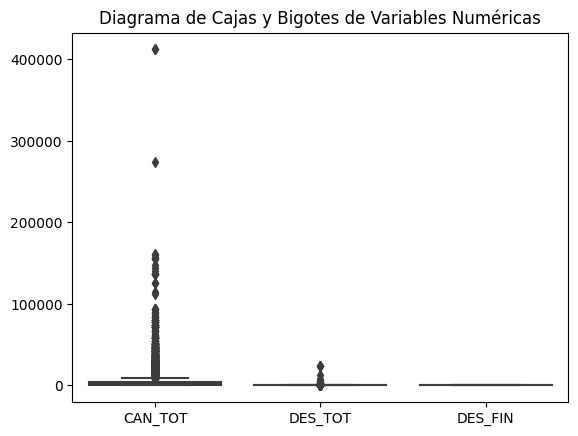

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Variables numéricas a visualizar
variables = ['CAN_TOT', 'DES_TOT', 'DES_FIN']
# Crear el diagrama de cajas y bigotes con colores
sns.boxplot(data=fact[variables])
# Título del gráfico
plt.title('Diagrama de Cajas y Bigotes de Variables Numéricas')
# Mostrar el gráfico
plt.show()

## **2do Diagrama de cajas y bigotes (Boxplot)**
>El objetivo de este gráfico de barras apiladas es visualizar la distribución del monto total (CAN_TOT) de las facturas en función del estado de la factura (STATUS).Esto permitirá comparar visualmente la distribución de los montos totales en función del estado de las facturas.

>Es importante destacar que el gráfico de barras apiladas no es la visualización más común para representar variables numéricas como el monto total. Sin embargo, en este caso, el gráfico mostrará la distribución de los montos totales dentro de cada estado de la factura, lo que puede ser útil para comparar la variabilidad y la dispersión de los montos en diferentes estados.

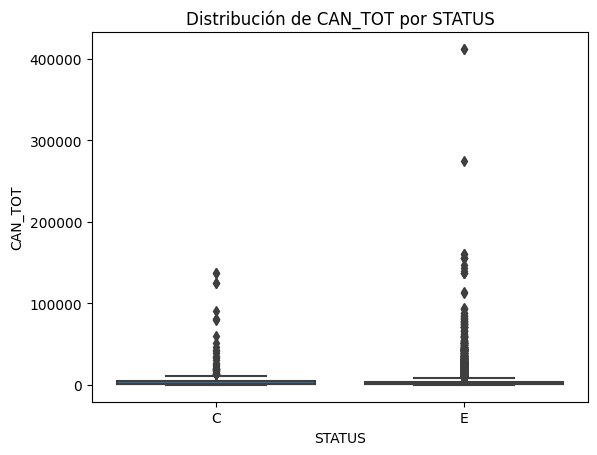

In [ ]:
import seaborn as sns
# Crear un gráfico de barras apiladas
sns.boxplot(x='STATUS', y='CAN_TOT', data=fact)
# Título del gráfico
plt.title('Distribución de CAN_TOT por STATUS')
# Mostrar el gráfico
plt.show()

## **Histogramas**
>El objetivo de esos histogramas separados por el estado (emitidas y canceladas) y por el año de la fecha de documento es visualizar y comparar las distribuciones de los montos totales (CAN_TOT) de las facturas en función de diferentes categorías.

>Al separar los histogramas por el estado de las facturas, se puede observar cómo difieren las distribuciones de los montos totales entre las facturas emitidas y las canceladas. Esto puede ayudar a identificar patrones o diferencias significativas en los montos totales según el estado de la factura.Además, al separar los histogramas por el año de la fecha de documento, se puede analizar cómo ha evolucionado la distribución de los montos totales a lo largo del tiempo.

In [ ]:
#Crear dos subconjuntos de datos separados para las facturas E y C
fact_emitidas = fact[fact['STATUS'] == 'emitidas']
fact_canceladas = fact[fact['STATUS'] == 'canceladas']
#Agregar una columna adicional al dataframe q represente el año de la fecha
fact['AÑO'] = fact['FECHA_DOC'].dt.year

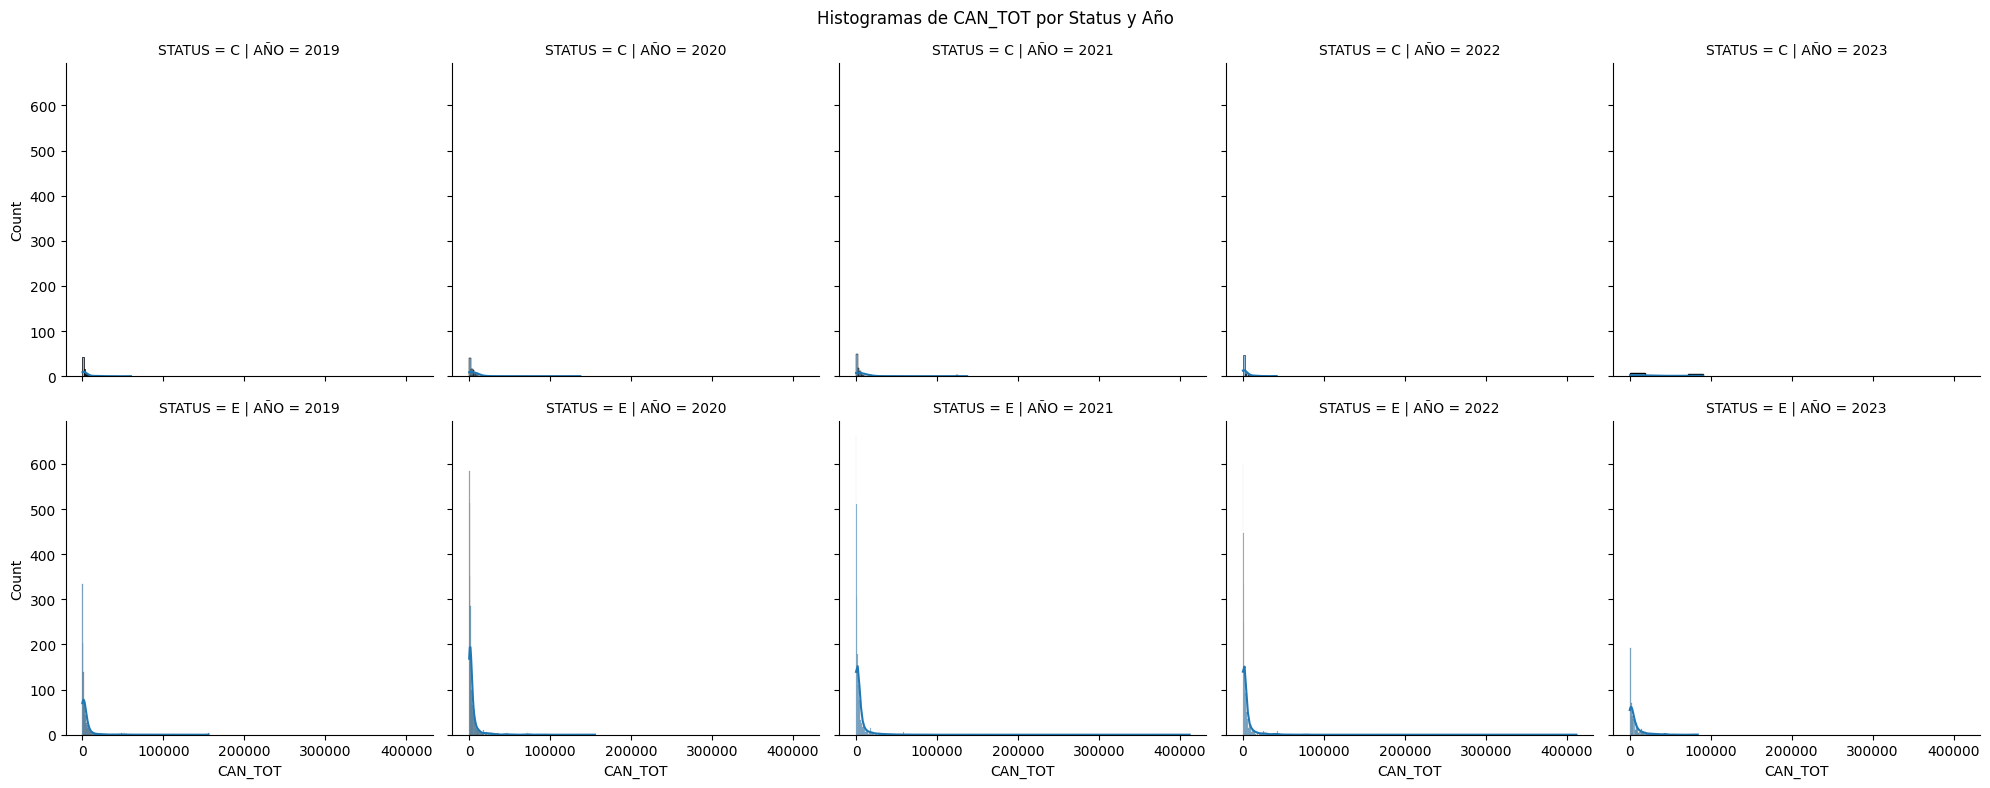

In [ ]:
g = sns.FacetGrid(data=fact, row='STATUS', col='AÑO', height=4)
g.map(sns.histplot, 'CAN_TOT', kde=True)
# Título del gráfico
g.fig.suptitle('Histogramas de CAN_TOT por Status y Año')
# Ajustar la disposición del gráfico
plt.tight_layout()
# Mostrar el gráfico
plt.show()

## **Mapa de Calor**
>El objetivo de este mapa de calor es visualizar la matriz de correlación entre las variables "CAN_TOT" (monto total) y "DES_TOT" (descuento total) de las facturas.

>La matriz de correlación muestra la relación estadística entre pares de variables. En este caso, el mapa de calor representa los coeficientes de correlación entre las variables seleccionadas. Los coeficientes de correlación varían entre -1 y 1, donde 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta y 0 indica la ausencia de correlación.

>El mapa de calor utiliza colores para resaltar la fuerza y la dirección de la correlación entre las variables. En este caso, se utiliza la paleta de colores 'coolwarm', donde los tonos azules indican una correlación negativa, los tonos rojos indican una correlación positiva y los tonos más claros indican una correlación cercana a cero.

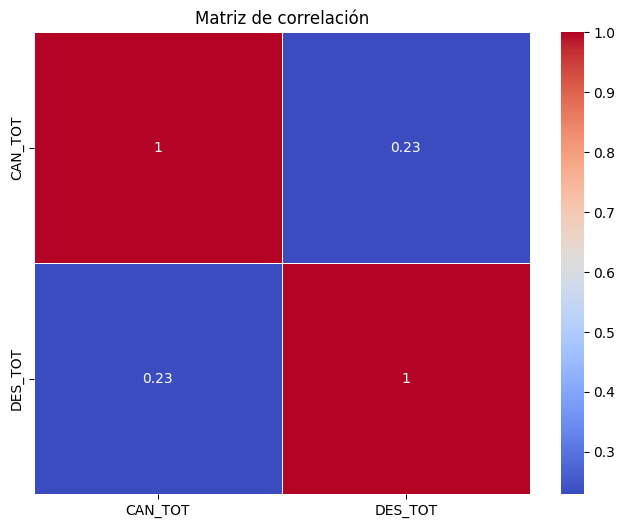

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Selecciona las variables relevantes para el cálculo de la correlación
variables = ['CAN_TOT', 'DES_TOT']
fact_selected = fact[variables]
# Calcula la matriz de correlación
correlation_matrix = fact_selected.corr()
# Crea un mapa de calor utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()